## Download dataset

In [32]:
!kaggle datasets download -d abhishekgautam101/coco-person-class-object-detection-dataset

 98%|███████████████████████████████████████ | 405M/414M [00:08<00:00, 49.6MB/s]
100%|████████████████████████████████████████| 414M/414M [00:08<00:00, 50.2MB/s]


In [34]:
!7z x coco-person-class-object-detection-dataset.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs x64)

Scanning the drive for archives:
  0M Sca        1 file, 434212782 bytes (415 MiB)

Extracting archive: coco-person-class-object-detection-dataset.zip
--
Path = coco-person-class-object-detection-dataset.zip
Type = zip
Physical Size = 434212782



      1% 36 - coco_person_dataset/coco_downloaded_images/000000006460.jp                                                                      2% 68 - coco_person_dataset/coco_downloaded_images/000000012120.jp                                                                      4% 1        5% 1        6% 1        7% 1        7% 207 - coco_person_dataset/coco_downloaded_images/000000039951.j                                                                      8% 2        9% 254 - coco_person_dataset/coco_downloaded_images/000000051314.j                                                                     10% 2       11% 299 - coco_person_dataset/coco_downloaded_images/000000060347.j                                                                     12% 320 - coco_person_dataset/coco_downloaded_images/000000064523.j                                                                     12% 341 - coco_person_dataset/coco_downloaded_images/000000068093.j                                        

                                                                       64% 1729 - coco_person_dataset/coco_downloaded_images/000000371529.jp                                                                       64% 1736 - coco_person_dataset/coco_downloaded_images/000000373315.jp                                                                       64% 1743 - coco_person_dataset/coco_downloaded_images/000000374545.jp                                                                       65% 1750 - coco_person_dataset/coco_downloaded_images/000000376206.jp                                                                       65% 175         65% 1763 - coco_person_dataset/coco_downloaded_images/000000377723.jp                                                                       65% 1770 - coco_person_dataset/coco_downloaded_images/000000378515.jp                                                                       66% 1777 - coco_person_dataset/coco_downloaded_images/000000381360.jp   

                                                                       82% 2210 - coco_person_dataset/coco_downloaded_images/000000470773.jp                                                                       82% 2217 - coco_person_dataset/coco_downloaded_images/000000471756.jp                                                                       82% 2224 - coco_person_dataset/coco_downloaded_images/000000473121.jp                                                                       83% 2231 - coco_person_dataset/coco_downloaded_images/000000474039.jp                                                                       83% 2238 - coco_person_dataset/coco_downloaded_images/000000475064.jp                                                                       83% 2245 - coco_person_dataset/coco_downloaded_images/000000476258.jp                                                                       83% 2252 - coco_person_dataset/coco_downloaded_images/000000477689.jp                   

                                                                       95% 2584 - coco_person_dataset/coco_downloaded_images/000000558854.jp                                                                       95% 2589 - coco_person_dataset/coco_downloaded_images/000000559842.jp                                                                       96% 2594 - coco_person_dataset/coco_downloaded_images/000000560911.jp                                                                       96% 2599 - coco_person_dataset/coco_downloaded_images/000000562229.jp                                                                       96% 2604 - coco_person_dataset/coco_downloaded_images/000000563267.jp                                                                       96% 2610 - coco_person_dataset/coco_downloaded_images/000000563653.jp                                                                       97% 2615 - coco_person_dataset/coco_downloaded_images/000000565045.jp                   

In [35]:
!rm coco-person-class-object-detection-dataset.zip

In [37]:
!rm coco_person_dataset/annotations_download_person.csv coco_person_dataset/._annotations_download_person.csv

In [39]:
!mv annotations_download_person.csv coco_person_dataset/

## Import libraries

In [2]:
import numpy as np
import pandas as pd
import os
import re
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from tqdm import tqdm
import torch

print("Pytorch: " + "GPU" if torch.cuda.is_available() else "CPU")

Pytorch: GPU


## Handle Yolo Ultralytics

In [3]:
!rm -rf ./yolov5 && git clone https://github.com/ultralytics/yolov5.git && cd ./yolov5/ && pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15002, done.
remote: Total 15002 (delta 0), reused 0 (delta 0), pack-reused 15002
Receiving objects: 100% (15002/15002), 14.08 MiB | 1.34 MiB/s, done.
Resolving deltas: 100% (10291/10291), done.


## Handle Data reading

In [4]:
dataf = pd.read_csv("./coco_person_dataset/annotations_download_person.csv",
                   names=["path", "min_x", "min_y", "max_x", "max_y", "label"],
                   header=None)

In [5]:
dataf.head()

,path,min_x,min_y,max_x,max_y,label
0,/Volumes/My Passport/Datasets/coco_downloaded_...,251,168,321,233,person
1,/Volumes/My Passport/Datasets/coco_downloaded_...,286,371,298,390,person
2,/Volumes/My Passport/Datasets/coco_downloaded_...,69,38,577,474,person
3,/Volumes/My Passport/Datasets/coco_downloaded_...,567,1,640,88,person
4,/Volumes/My Passport/Datasets/coco_downloaded_...,590,92,640,189,person


In [6]:
dataf["path"] = dataf["path"].apply(lambda x: "./coco_person_dataset/coco_downloaded_images/"+x.split("/")[-1])

In [7]:
dataf

,path,min_x,min_y,max_x,max_y,label
0,./coco_person_dataset/coco_downloaded_images/0...,251,168,321,233,person
1,./coco_person_dataset/coco_downloaded_images/0...,286,371,298,390,person
2,./coco_person_dataset/coco_downloaded_images/0...,69,38,577,474,person
3,./coco_person_dataset/coco_downloaded_images/0...,567,1,640,88,person
4,./coco_person_dataset/coco_downloaded_images/0...,590,92,640,189,person
...,...,...,...,...,...,...
10999,./coco_person_dataset/coco_downloaded_images/0...,361,262,366,282,person
11000,./coco_person_dataset/coco_downloaded_images/0...,174,249,189,268,person
11001,./coco_person_dataset/coco_downloaded_images/0...,471,85,490,128,person
11002,./coco_person_dataset/coco_downloaded_images/0...,0,0,421,477,person


In [8]:
dataf["height"] = dataf.apply(lambda x: x["max_y"]-x["min_y"], axis=1)
dataf["width"] = dataf.apply(lambda x: x["max_x"]-x["min_x"], axis=1)
dataf["label_arr"] = dataf.apply(lambda x: [x["min_x"], x["min_y"], x["width"], x["height"]], axis=1)
dataf_m = dataf.drop(["height", "width", "min_x", "max_x", "min_y", "max_y", "label"], axis=1)

In [9]:
labels_array = []
for i in dataf_m["path"].unique():
    tmp_l = []
    for l in dataf_m[dataf_m["path"] == i]["label_arr"]:
        tmp_l.append(l)
    labels_array.append((i, tmp_l))

dataf_m1 = pd.DataFrame(data=labels_array, columns=["path", "labels"])
dataf_m1

,path,labels
0,./coco_person_dataset/coco_downloaded_images/0...,"[[251, 168, 70, 65], [286, 371, 12, 19]]"
1,./coco_person_dataset/coco_downloaded_images/0...,"[[69, 38, 508, 436], [567, 1, 73, 87], [590, 9..."
2,./coco_person_dataset/coco_downloaded_images/0...,"[[0, 308, 273, 171]]"
3,./coco_person_dataset/coco_downloaded_images/0...,"[[0, 1, 246, 66]]"
4,./coco_person_dataset/coco_downloaded_images/0...,"[[94, 194, 60, 143]]"
...,...,...
2688,./coco_person_dataset/coco_downloaded_images/0...,"[[272, 95, 106, 148], [464, 0, 176, 423]]"
2689,./coco_person_dataset/coco_downloaded_images/0...,"[[164, 254, 51, 117], [219, 252, 17, 27], [236..."
2690,./coco_person_dataset/coco_downloaded_images/0...,"[[471, 85, 19, 43]]"
2691,./coco_person_dataset/coco_downloaded_images/0...,"[[0, 0, 421, 477]]"


## Split into test and train datasets

In [10]:
test = dataf_m1.sample(frac=0.1, axis=0)
train = dataf_m1.drop(index=test.index)
test = test.reset_index(drop=True)
train = train.reset_index(drop=True)

In [11]:
test.head()

,path,labels
0,./coco_person_dataset/coco_downloaded_images/0...,"[[0, 193, 453, 441], [246, 266, 20, 27], [217,..."
1,./coco_person_dataset/coco_downloaded_images/0...,"[[202, 142, 108, 117]]"
2,./coco_person_dataset/coco_downloaded_images/0...,"[[273, 564, 11, 37], [185, 565, 2, 7], [235, 5..."
3,./coco_person_dataset/coco_downloaded_images/0...,"[[296, 64, 63, 66], [1, 168, 128, 252], [67, 1..."
4,./coco_person_dataset/coco_downloaded_images/0...,"[[330, 176, 24, 23], [312, 174, 25, 28], [118,..."


## Bring Label Coordinate to Yolov5 standard

In [12]:
def centerLabel(x_):
    h, w, _ = cv2.imread(x_["path"]).shape    
    new_l = []
    for x in x_["labels"]:
        new_l.append(
            [
                (x[0]+x[2]/2)/w,
                (x[1]+x[3]/2)/h,
                x[2]/w,
                x[3]/h   
            ])
    return new_l    

In [13]:
train["labels"] = train.apply(lambda x: centerLabel(x), axis=1)
train

,path,labels
0,./coco_person_dataset/coco_downloaded_images/0...,"[[0.446875, 0.4706572769953052, 0.109375, 0.15..."
1,./coco_person_dataset/coco_downloaded_images/0...,"[[0.5046875, 0.5333333333333333, 0.79375, 0.90..."
2,./coco_person_dataset/coco_downloaded_images/0...,"[[0.21328125, 0.8197916666666667, 0.4265625, 0..."
3,./coco_person_dataset/coco_downloaded_images/0...,"[[0.1921875, 0.07962529274004684, 0.384375, 0...."
4,./coco_person_dataset/coco_downloaded_images/0...,"[[0.19375, 0.553125, 0.09375, 0.29791666666666..."
...,...,...
2419,./coco_person_dataset/coco_downloaded_images/0...,"[[0.5078125, 0.39952718676122934, 0.165625, 0...."
2420,./coco_person_dataset/coco_downloaded_images/0...,"[[0.4566265060240964, 0.48828125, 0.1228915662..."
2421,./coco_person_dataset/coco_downloaded_images/0...,"[[0.75078125, 0.221875, 0.0296875, 0.089583333..."
2422,./coco_person_dataset/coco_downloaded_images/0...,"[[0.43854166666666666, 0.37265625, 0.877083333..."


In [14]:
test["labels"] = test.apply(lambda x: centerLabel(x), axis=1)
test

,path,labels
0,./coco_person_dataset/coco_downloaded_images/0...,"[[0.471875, 0.64609375, 0.94375, 0.6890625], [..."
1,./coco_person_dataset/coco_downloaded_images/0...,"[[0.4, 0.43681917211328974, 0.16875, 0.2549019..."
2,./coco_person_dataset/coco_downloaded_images/0...,"[[0.6507009345794392, 0.91015625, 0.0257009345..."
3,./coco_person_dataset/coco_downloaded_images/0...,"[[0.51171875, 0.22769953051643194, 0.0984375, ..."
4,./coco_person_dataset/coco_downloaded_images/0...,"[[0.684, 0.5, 0.048, 0.06133333333333333], [0...."
...,...,...
264,./coco_person_dataset/coco_downloaded_images/0...,"[[0.8125, 0.9379391100702577, 0.015625, 0.0679..."
265,./coco_person_dataset/coco_downloaded_images/0...,"[[0.75390625, 0.710093896713615, 0.0953125, 0...."
266,./coco_person_dataset/coco_downloaded_images/0...,"[[0.3938356164383562, 0.6390625, 0.17465753424..."
267,./coco_person_dataset/coco_downloaded_images/0...,"[[0.26484375, 0.6615925058548009, 0.1359375, 0..."


## Create working directory

### Init wroking directory

In [15]:
!rm -rf "./training" && mkdir -p "./training/labels" "./training/images"

### Write annotations to files

In [16]:
def printLabels(df):
    for i in df.index:
        with open(os.path.join("./training","labels",df["path"].iloc[i].split('/')[-1].split('.')[0]+".txt"), "w") as outfile:
            for arr in df["labels"].iloc[i]:
                outfile.write(f"0 {arr[0]} {arr[1]} {arr[2]} {arr[3]}\n")
            outfile.close()

printLabels(train)

### Copy Images to training directory

In [17]:
import shutil
for i in train["path"]:
    shutil.copyfile(i, os.path.join("./training","images", i.split('/')[-1]))
    

## Train Model

In [18]:
# !cd ./yolov5 && python train.py --img 704 --batch 16 --epochs 15 --data ../files/data.yaml --weights yolov5s.pt --device 0

In [19]:
# !rm -rf modelSaves/ && mkdir modelSaves/ && cp ./yolov5/runs/train/exp/weights/best.pt ./modelSaves/best.pt && cp ./yolov5/runs/train/exp/weights/last.pt ./modelSaves/last.pt

## Load model and visualize results

In [20]:
model = torch.hub.load("./yolov5", "custom", source='local', path="./modelSaves/best.pt", force_reload=True)

YOLOv5 🚀 v7.0-72-g064365d Python-3.8.15 torch-1.7.1 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11178MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [30]:
result = model(test.iloc[29]["path"])
print(result.xyxy[0])
# print(test.iloc[29]["labels"])

tensor([[2.57295e+02, 1.67020e+02, 3.34838e+02, 4.01920e+02, 8.24820e-01, 0.00000e+00],
        [4.89463e+01, 2.74558e+02, 7.95959e+01, 3.38511e+02, 8.20580e-01, 0.00000e+00],
        [1.15083e+02, 2.65939e+02, 1.50489e+02, 3.92495e+02, 7.43286e-01, 0.00000e+00],
        [3.85796e+02, 2.70892e+02, 4.12706e+02, 3.03485e+02, 7.29553e-01, 0.00000e+00],
        [4.06749e+02, 2.70985e+02, 4.58542e+02, 3.33076e+02, 7.24586e-01, 0.00000e+00],
        [3.54304e+02, 2.67950e+02, 3.86654e+02, 2.96814e+02, 7.02659e-01, 0.00000e+00],
        [3.41000e+02, 2.69230e+02, 3.72562e+02, 2.98250e+02, 6.79743e-01, 0.00000e+00],
        [5.59672e+02, 2.71185e+02, 5.97668e+02, 3.74234e+02, 6.61307e-01, 0.00000e+00],
        [5.35448e+02, 2.79373e+02, 5.61001e+02, 3.44481e+02, 4.83689e-01, 0.00000e+00],
        [5.10231e+02, 2.85075e+02, 5.39806e+02, 3.74055e+02, 3.63461e-01, 0.00000e+00],
        [3.25798e+02, 2.61665e+02, 3.46340e+02, 3.00226e+02, 3.49045e-01, 0.00000e+00],
        [5.43358e-01, 2.53223e+0

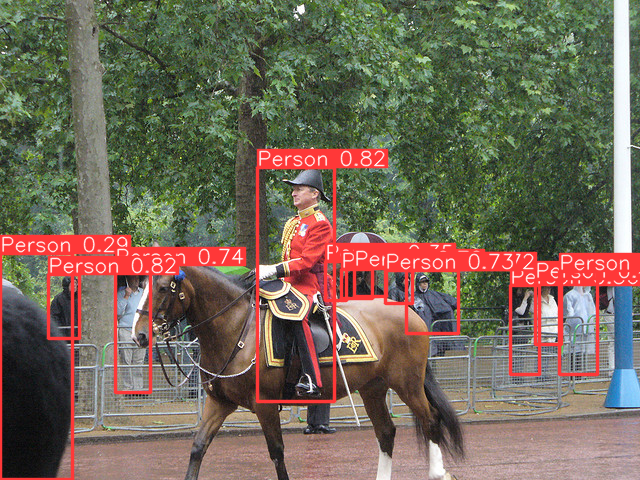

In [29]:
result.show()